In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as spc

In [71]:
def get_active_cells(traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(traces.keys())

    for cell in traces:
        if traces[cell]['active'] == True:
            d[cell] = traces[cell]
        else:
            d.pop(cell,None)

    return d

In [72]:
traces = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID269/ID269_19042023_psilocybin/TSeries-04192023-1137-073/suite2p/plane0/raw_deconvolved_traces.npy"

deconvolved = np.load(traces, allow_pickle=True)
print(len(deconvolved[0,0:3000]))
print(type(deconvolved))

cell_dict = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID269/ID269_19042023_psilocybin/TSeries-04192023-1137-073/suite2p/plane0/cells.pkl"

with open(cell_dict,'rb') as f:
    cell_dict = pickle.load(f)
    print(cell_dict.keys())



3000
<class 'numpy.ndarray'>
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 174, 175, 176, 177, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 197, 198, 201, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 223, 226, 227, 229, 231, 235, 236, 237, 239, 240, 241, 242, 243, 244, 249, 250, 251, 252, 253, 256, 257, 259, 260

In [73]:
# active_dict = get_active_cells(cell_dict)
# active_list = active_dict.keys()

# active_list = [x - 1 for x in active_list] #Add 0 indexing for np array 

# deconvolved_active = deconvolved[active_list,:]
# print(len(deconvolved_active[0,:]))





In [74]:
count = []
for i in range(0,len(deconvolved_active[:,0])):
    num_spikes = np.sum(deconvolved_active[i,:])
    count.append(num_spikes)

print(count)
print(max(count))
print(min(count))

[50919.785, 24597.773, 16549.129, 37975.668, 22590.832, 25685.213, 61402.67, 13682.509, 38957.773, 143619.31, 17367.246, 59808.754, 29283.322, 10577.255, 8635.155, 83496.82, 21374.396, 43443.645, 47333.02, 8060.334, 10192.912, 4500.9556, 41262.605, 11302.9795, 49994.5, 47605.504, 6956.588, 8000.24, 13834.122, 33384.504, 10733.236, 76538.27, 10783.1455, 6048.4, 12181.056, 13478.796, 8460.908, 5191.7827, 10012.285, 8413.568, 17367.498, 6397.498, 10677.059, 16255.755, 5350.765, 9953.789, 14525.961, 11220.783, 11135.007, 14026.684, 20347.482, 6113.2744, 11425.142, 10863.303, 8344.707, 6646.73, 2617.629, 7664.167, 5256.9014, 12084.924, 12687.047, 9993.507, 9799.636, 7741.802, 15385.348, 9159.82, 105836.375, 6383.33, 10594.303, 20216.758, 33569.523, 4436.903, 5616.734, 7960.7837, 4769.0234, 6126.4126, 15175.277, 10153.178, 12750.556, 6348.3145, 6765.9043, 5492.758, 6086.161, 22245.86, 3106.3267, 6916.3076, 9108.098, 11023.712, 7305.5244, 4138.9106, 11508.526, 18712.24, 2611.752, 30962.766, 8

In [75]:
count_all = []
for i in range(0,len(deconvolved[:,0])):
    num_spikes = np.sum(deconvolved[i,:])
    count_all.append(num_spikes)

print(min(count_all))
print(max(count_all))

1823.177
160712.06


In [76]:
means_early = []
means_late = []
for i in range(0,len(deconvolved_active[:,0])):
    deconvolved_mean_early = np.mean(deconvolved_active[i,0:3000])
    deconvolved_mean_late = np.mean(deconvolved_active[i,4000:7000])
    means_early.append(deconvolved_mean_early)
    means_late.append(deconvolved_mean_late)
print(means_early)
print(len(means_late))

[5.821729, 2.7824333, 0.4744325, 4.1292777, 2.2675376, 1.2215072, 1.1653357, 0.94658405, 6.2399635, 20.157959, 0.47893664, 0.556267, 2.891608, 1.827018, 0.9714955, 7.4912214, 1.8897893, 0.5614626, 4.162707, 1.1632012, 1.3108128, 0.5024966, 2.2805862, 1.9317944, 10.482819, 7.519413, 1.3086054, 0.60030675, 0.8002032, 4.768398, 1.021426, 9.488396, 1.2719079, 0.53223985, 1.9438462, 1.0263112, 0.9415861, 0.61919713, 0.7300802, 1.1611809, 2.063941, 0.683263, 1.4036928, 1.5107747, 0.61925733, 1.2268753, 1.134814, 1.2674932, 1.324371, 1.4691108, 4.205928, 0.6595586, 1.0248514, 1.0047522, 0.87817544, 0.5814198, 0.2274224, 1.0229582, 0.54008746, 1.0984273, 0.964243, 1.0140818, 1.1123592, 0.9005682, 2.163276, 0.93868935, 17.047213, 0.85024816, 1.0799303, 1.9741807, 2.5953913, 0.5108702, 0.6004889, 0.57585776, 0.538708, 0.67046934, 1.3899059, 1.1463625, 1.4015485, 0.6267574, 0.82771796, 0.69053376, 0.7459442, 2.977132, 0.28890523, 0.72002214, 1.5084784, 1.5703896, 0.75025904, 0.45595834, 1.4470147

In [77]:
print("the early mean is",np.mean(means_early),"with SD",np.std(means_early))
print("the late mean is",np.mean(means_late), "with SD",np.std(means_late))


the early mean is 1.6204829 with SD 2.2749026
the late mean is 1.6436517 with SD 2.0817702


(array([0.        , 0.        , 0.        , 0.        , 0.31578947,
        0.10526316, 0.10526316, 0.21052632, 0.21052632, 0.73684211,
        1.15789474, 1.15789474, 0.73684211, 1.15789474, 0.63157895,
        0.63157895, 0.63157895, 0.31578947, 0.73684211, 0.42105263,
        1.15789474, 0.42105263, 0.63157895, 0.52631579, 0.52631579,
        0.52631579, 0.84210526, 0.21052632, 0.42105263, 0.52631579,
        0.42105263, 0.31578947, 0.10526316, 0.10526316, 0.10526316,
        0.31578947, 0.10526316, 0.21052632, 0.21052632, 0.10526316,
        0.        , 0.10526316, 0.        , 0.21052632, 0.        ,
        0.21052632, 0.10526316, 0.10526316, 0.10526316, 0.10526316,
        0.        , 0.10526316, 0.        , 0.        , 0.        ,
        0.10526316, 0.10526316, 0.10526316, 0.        , 0.21052632,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10526316, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

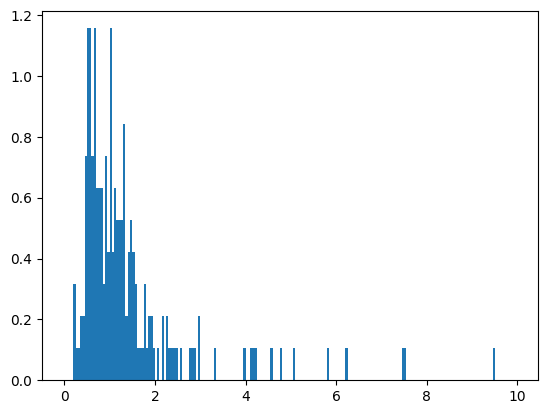

In [78]:
bins = np.arange(0,10,0.05)
plt.hist(means_early,bins=bins,density=True)

(array([0.        , 0.        , 0.        , 0.        , 0.10582011,
        0.21164021, 0.21164021, 0.21164021, 0.42328042, 0.31746032,
        0.74074074, 1.05820106, 1.26984127, 1.16402116, 0.63492063,
        0.95238095, 0.42328042, 0.74074074, 0.52910053, 1.16402116,
        0.84656085, 0.42328042, 1.05820106, 0.63492063, 0.63492063,
        0.10582011, 0.21164021, 0.        , 0.42328042, 0.21164021,
        0.31746032, 0.21164021, 0.21164021, 0.10582011, 0.42328042,
        0.10582011, 0.31746032, 0.        , 0.21164021, 0.10582011,
        0.21164021, 0.31746032, 0.10582011, 0.        , 0.10582011,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10582011, 0.10582011, 0.        , 0.10582011, 0.        ,
        0.        , 0.10582011, 0.        , 0.        , 0.        ,
        0.31746032, 0.10582011, 0.        , 0.        , 0.        ,
        0.10582011, 0.        , 0.        , 0.        , 0.10582011,
        0.        , 0.        , 0.        , 0.  

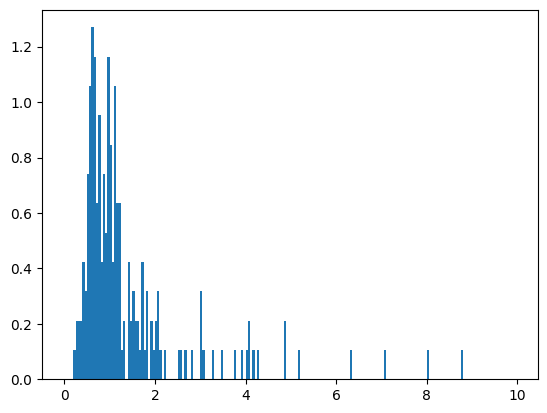

In [79]:
bins = np.arange(0,10,0.05)
plt.hist(means_late,bins=bins,density=True)

Text(0, 0.5, 'Normalized Frequency')

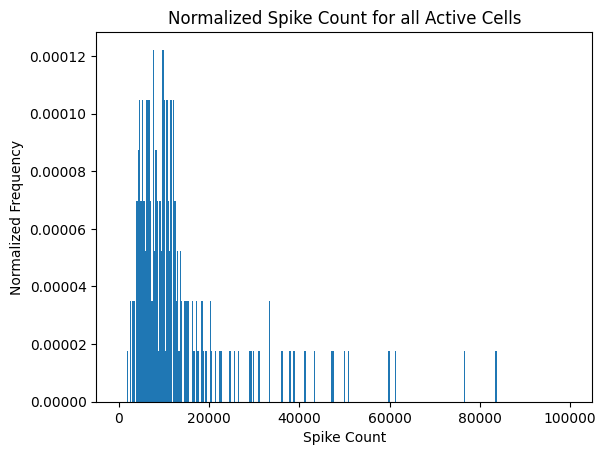

In [80]:
bins = np.arange(0,100000,300)
plt.hist(count,bins=bins,density=True)
plt.title("Normalized Spike Count for all Active Cells")
plt.xlabel("Spike Count")
plt.ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

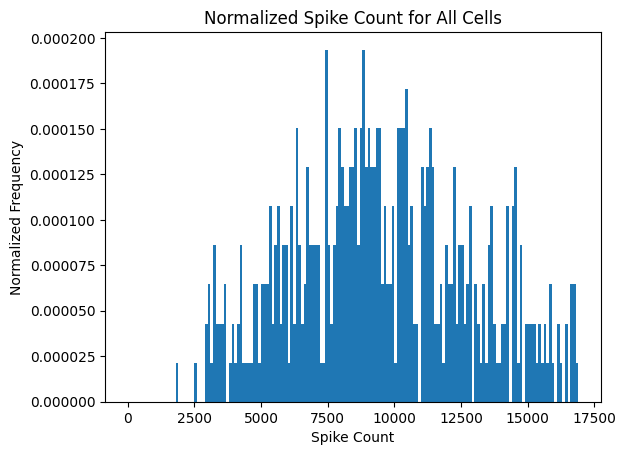

In [81]:
bins = np.arange(0,17000,100)
plt.hist(count_all,bins=bins,density=True)
plt.title("Normalized Spike Count for All Cells")
plt.xlabel("Spike Count")
plt.ylabel("Normalized Frequency")